In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import eval.eval as ev
import process.file as f
import utils.utils as uti
import visualize.visualizer as vis
import os
import scipy.io as sio
import scipy
import tifffile
import seaborn as sns

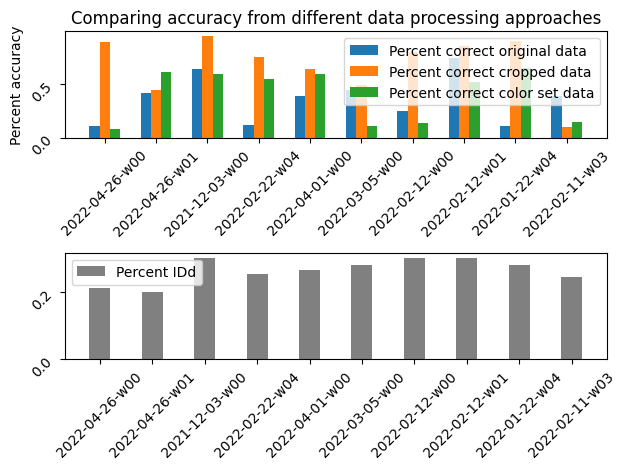

In [2]:
ev.comp_acc()

In [208]:
def comp_preprocess():

    approaches = ['base', 'resample', 'med', 'hist', 'histzoom','histmed', 'histmedzoom']
    labels = ['base', 'resample', 'median', 'histogram matched', 'hist match + resample', 'hist match + median', 
              'hist match + resample +median']

    results = np.zeros((len(approaches),10)) # rows will be approaches and columns will be datasets

    df_corr = pd.DataFrame(columns = ['approach', 'per_correct_top', 'per_correct_two', 'per_correct_three', 'per_correct_four'])

    for i, app in enumerate(approaches):
        folders = os.listdir('/Users/danielysprague/foco_lab/data/preprocess')
        folders = [folder for folder in folders if folder[0:2]=='20']
        for j, folder in enumerate(folders):
            if not folder[0:2] == '20':
                continue

            df = pd.read_csv('/Users/danielysprague/foco_lab/data/preprocess/'+folder+'/autoID_output_'+app+'.csv')
            gt = pd.read_csv('/Users/danielysprague/foco_lab/data/preprocess/'+folder+'/blobs.csv')

            df= df.rename(columns={'aligned_x': 'X', 'aligned_y': 'Y', 'aligned_z': 'Z', 'aligned_R':'R', 'aligned_G':'G', 'aligned_B':'B'})
            df['ID'] = gt['ID']

            df.loc[df['ID'].str[-1].isin(['?']),'ID'] = np.nan

            reverse = df.copy()

            reverse['ID'] = reverse['ID'].str.replace(r'(L|R)$', lambda m: 'R' if m.group()=='L' else 'L', regex=True)

            IDd = df.loc[pd.notna(df['ID']),:]

            corr_1 = df.loc[df['ID']==df['autoID_1']]
            corr_2 = df.loc[df['ID']==df['autoID_2']]
            corr_3 = df.loc[df['ID']==df['autoID_3']]
            corr_4 = df.loc[df['ID']==df['autoID_4']]

            rev_1 = reverse.loc[reverse['ID']==reverse['autoID_1']]
            rev_2 = reverse.loc[reverse['ID']==reverse['autoID_2']]
            rev_3 = reverse.loc[reverse['ID']==reverse['autoID_3']]
            rev_4 = reverse.loc[reverse['ID']==reverse['autoID_4']]

            cumcorr_2 = pd.concat([corr_1, corr_2]).drop_duplicates().reset_index(drop=True)
            cumcorr_3 = pd.concat([corr_1, corr_2, corr_3]).drop_duplicates().reset_index(drop=True)
            cumcorr_4 = pd.concat([corr_1, corr_2, corr_3, corr_4]).drop_duplicates().reset_index(drop=True)

            cumrev_2 = pd.concat([rev_1, rev_2]).drop_duplicates().reset_index(drop=True)
            cumrev_3 = pd.concat([rev_1, rev_2, rev_3]).drop_duplicates().reset_index(drop=True)
            cumrev_4 = pd.concat([rev_1, rev_2, rev_3, rev_4]).drop_duplicates().reset_index(drop=True)


            per_corr_top = (max(len(corr_1.index), len(rev_1.index))/len(IDd.index))*100
            per_corr_2 = (max(len(cumcorr_2.index), len(cumrev_2.index))/len(IDd.index))*100
            per_corr_3 = (max(len(cumcorr_3.index), len(cumrev_3.index))/len(IDd.index))*100
            per_corr_4 = (max(len(cumcorr_3.index), len(cumrev_3.index))/len(IDd.index))*100

            df_corr = pd.concat([df_corr, pd.DataFrame([{'approach':labels[i], 'per_correct_top':per_corr_top, 'per_correct_two':per_corr_2, 'per_correct_three':per_corr_3, 'per_correct_four':per_corr_4}])])
    

    fig, axes = plt.subplots(2,1, sharex=True, sharey=True)
    sns.set_style("white")
    sns.set_context("poster")
    sns.set(font_scale=2)
    sns.stripplot(ax=axes[0], data=df_corr, x='approach', y='per_correct_top', hue='approach', jitter=True, size=10)
    sns.boxplot(ax=axes[0], showmeans=True, 
                meanline=True, 
                meanprops={'color':'k','ls':'-', 'lw':2},
                medianprops={'visible':False},
                whiskerprops={'visible':False},
                data = df_corr,
                x='approach',
                y='per_correct_top',
                showfliers=False,
                showbox=False,
                showcaps=False)
    
    sns.stripplot(ax=axes[1], data=df_corr, x='approach', y='per_correct_four', hue='approach', jitter=True, size=10)
    sns.boxplot(ax=axes[1], showmeans=True, 
                meanline=True, 
                meanprops={'color':'k','ls':'-', 'lw':2},
                medianprops={'visible':False},
                whiskerprops={'visible':False},
                data = df_corr,
                x='approach',
                y='per_correct_four',
                showfliers=False,
                showbox=False,
                showcaps=False)
    
    axes[0].set_title('Percent correct - top prediction')
    axes[1].set_title('Pecent correct - top 4 predictions ')
    axes[0].set_ylabel('% correct labels')
    axes[1].set_ylabel('% correct labels')
    axes[0].set_xlabel(None)
    axes[1].set_xlabel(None)
    axes[1].set(xticklabels=[])
    axes[0].set_ylim((0,100))
    axes[1].set_ylim((0,100))
    axes[1].get_legend().remove()
    sns.move_legend(axes[0], "upper left", bbox_to_anchor=(1,1), title='Pre-processing steps')
    
    plt.xticks(rotation=45)

    plt.show()

In [209]:
%matplotlib qt
comp_preprocess()

2023-06-12 11:01:17.389 python[76472:10023202] +[CATransaction synchronize] called within transaction
2023-06-12 11:01:21.875 python[76472:10023202] +[CATransaction synchronize] called within transaction
2023-06-12 11:01:23.200 python[76472:10023202] +[CATransaction synchronize] called within transaction
2023-06-12 11:01:23.513 python[76472:10023202] +[CATransaction synchronize] called within transaction


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


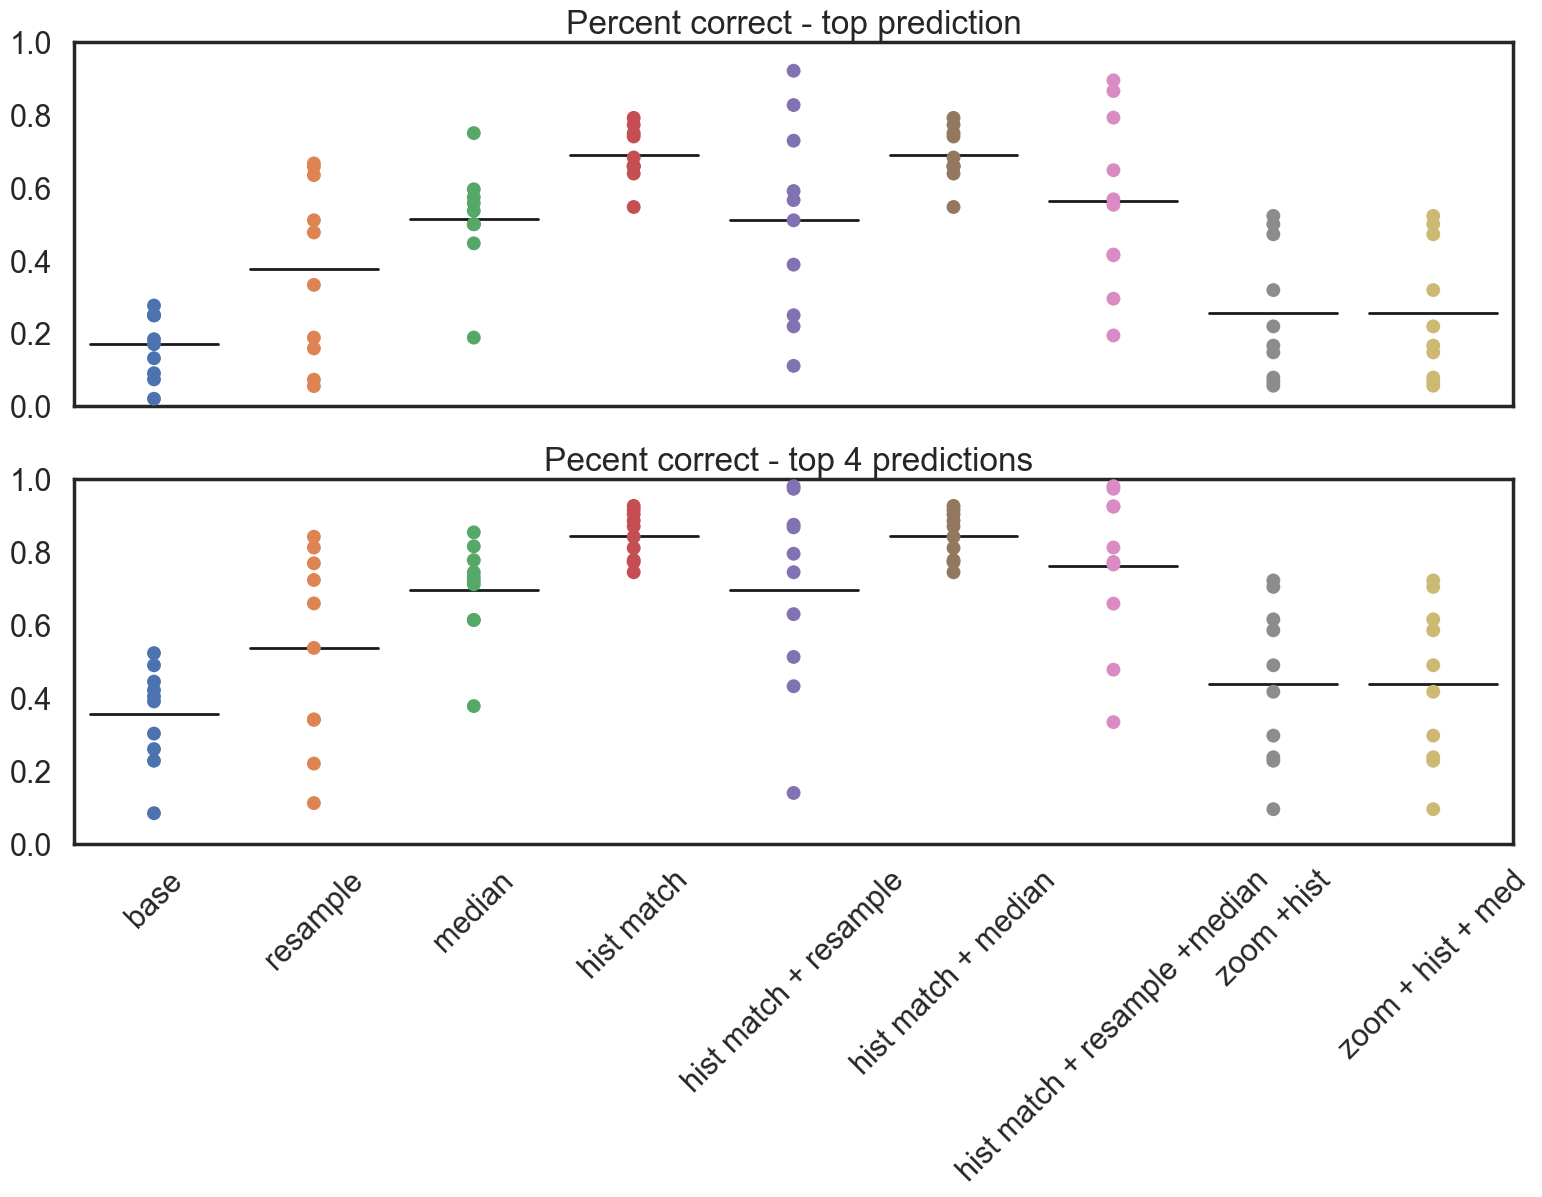

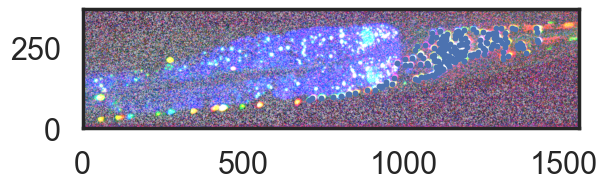

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


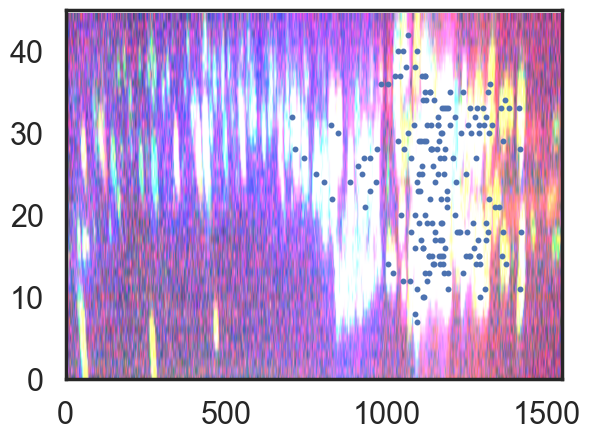

In [131]:
%matplotlib inline

image = sio.loadmat('/Users/danielysprague/foco_lab/data/preprocess/2022-04-26-w01-NP1/zoomhist.mat')['data']
image = np.transpose(image, (1,0,2,3))

blobs = pd.read_csv('/Users/danielysprague/foco_lab/data/preprocess/2022-04-26-w01-NP1/new_blobs.csv')

Zmax = np.max(image, axis=2)/4095
Ymax = np.max(image, axis=1)/4095

plt.figure()

plt.imshow(np.transpose(Zmax, [1,0,2]), vmin=0, vmax=255)
plt.scatter(blobs['X'], blobs['Y'], s=5)
plt.xlim((0, Zmax.shape[0]))
plt.ylim((0, Zmax.shape[1]))
plt.gca().set_aspect('equal')

plt.show()

plt.figure()

plt.imshow(np.transpose(Ymax, [1,0,2]), vmin=0, vmax=255)
plt.scatter(blobs['X'], blobs['Z'], s=5)
plt.xlim((0, Ymax.shape[0]))
plt.ylim((0, Ymax.shape[1]))
plt.gca().set_aspect('auto')

plt.show()

255

1
2
3
4
5
6
7
8
9


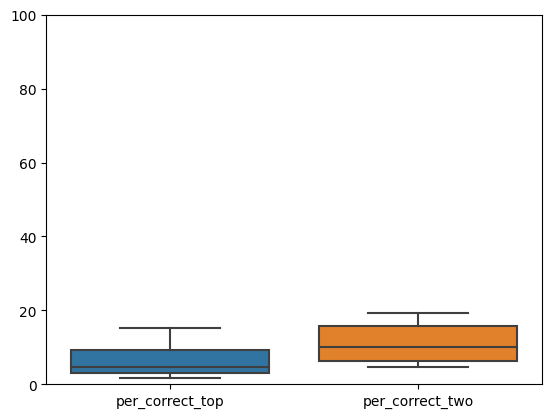

In [9]:
df_corr = pd.DataFrame(columns = ['per_correct_top', 'per_correct_two'])

for j in range(1,10):
    print(j)

    folder = '/Users/danielysprague/foco_lab/data/NP_chaudhary/'+str(j)+'/'

    df = pd.read_csv(folder+'/autoID_output_'+str(j)+'.csv')
    gt = pd.read_csv(folder+'mark_w_names.csv')

    df= df.rename(columns={'aligned_x': 'X', 'aligned_y': 'Y', 'aligned_z': 'Z', 'aligned_R':'R', 'aligned_G':'G', 'aligned_B':'B'})
    df['ID'] = gt['ID']

    df.loc[df['ID'].str[-1].isin(['?']),'ID'] = np.nan

    reverse = df.copy()

    reverse['ID'] = reverse['ID'].str.replace(r'(L|R)$', lambda m: 'R' if m.group()=='L' else 'L', regex=True)

    IDd = df.loc[pd.notna(df['ID']),:]

    corr_1 = df.loc[df['ID']==df['most_likely_ID']]
    corr_2 = df.loc[df['ID']==df['second_most_likely_ID']]

    rev_1 = reverse.loc[reverse['ID']==reverse['most_likely_ID']]
    rev_2 = reverse.loc[reverse['ID']==reverse['second_most_likely_ID']]

    cumcorr_2 = pd.concat([corr_1, corr_2]).drop_duplicates().reset_index(drop=True)

    cumrev_2 = pd.concat([rev_1, rev_2]).drop_duplicates().reset_index(drop=True)

    per_corr_top = (max(len(corr_1.index), len(rev_1.index))/len(IDd.index))*100
    per_corr_2 = (max(len(cumcorr_2.index), len(cumrev_2.index))/len(IDd.index))*100

    df_corr = pd.concat([df_corr, pd.DataFrame([{'per_correct_top':per_corr_top, 'per_correct_two':per_corr_2}])])

sns.boxplot(data=df_corr, orient='v')
plt.ylim((0,100))
plt.show()

In [8]:
df_corr

,per_correct_top,per_correct_two
0,1.612903,6.451613
0,5.172414,5.172414
0,9.375000,10.937500
0,4.761905,15.873016
0,3.125000,6.250000
0,11.940299,19.402985
0,15.151515,16.666667
0,3.030303,4.545455
0,4.347826,10.144928
